In [1]:
using Gen
using PyPlot

In [7]:
@gen (static) function initialize_state()
    
    # prior for the initial state of a simple harmonic oscillator.
    x_0 = @trace(Gen.normal(0.0, 1.0), :x_0)
    v_0 = @trace(Gen.normal(0.0, 5.0), :v_0) 
    result = Dict(["x"=>x_0 "v"=>v_0])
    return result

end

getfield(Main, Symbol("##StaticGenFunction_initialize_state#444"))(Dict{Symbol,Any}(), Dict{Symbol,Any}())

In [9]:
@gen (static) function sho_simulator(t::Int, s_prev::Dict, k::Float64, dt::Float64)
    
    # integrator for a simple harmonic oscillator:
    v_new = s_prev["v"] - k*dt*s_prev["x"]
    x_new = s_prev["x"] + dt*0.5*(s_prev["v"] + v_new)
    s_new = Dict(["x"=>x_new "v"=>v_new])

    y = @trace(Gen.normal(x_new, 1.0), :y)
    
    return s_new
end

getfield(Main, Symbol("##StaticGenFunction_sho_simulator#465"))(Dict{Symbol,Any}(), Dict{Symbol,Any}())

In [10]:
evolve_and_measure = Gen.Unfold(sho_simulator)

Unfold{Any,getfield(Main, Symbol("##StaticIRTrace_sho_simulator#464"))}(getfield(Main, Symbol("##StaticGenFunction_sho_simulator#465"))(Dict{Symbol,Any}(), Dict{Symbol,Any}()))

In [14]:
@gen (static) function data_generator(dt::Float64, T::Int64)
    
    s_init = @trace(initialize_state(), :s_0)
    k = @trace(Gen.gamma(5,1), :k)
    states = @trace(evolve_and_measure(T, s_init, k, dt), :measurements)

    return states
end

getfield(Main, Symbol("##StaticGenFunction_data_generator#507"))(Dict{Symbol,Any}(), Dict{Symbol,Any}())

In [15]:
Gen.load_generated_functions()

In [20]:
tr, _ = Gen.generate(data_generator, (0.01, 1000));

In [21]:
states = get_retval(tr);
true_xs = [s["x"] for s in states];
measured_xs = [tr[:measurements => i => :y] for i=1:1000];

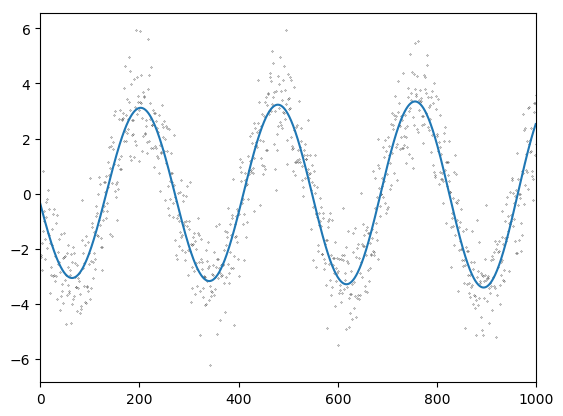

In [22]:
plot(true_xs)
scatter(1:1000, measured_xs, s=0.05, color="k")
xlim(0,1000)
show()